# Proyecto de clase 

Curso Aprendizaje Automático

Maestría de Inteligencia Artificial y Ciencia de Datos

Facultad de ingeniería

Universidad Autónoma de Occidente

----------------------------------------------------------------------------------------------

Presentado por:

Edna Rincón

Oscar Pulgarin

---------------------------------------------------------------

Fuente de los datos: https://data.mendeley.com/datasets/69nhkcxhp9/3

--------------------------------------------------------------------------

Este conjunto de datos colectado corresponde a una finca de aguacate Hass en la zona rural del municipio de Rionegro, Antioquia. Los datos incluyen información sobre el daño causado por dos pestes de insectos como la Mellonthiadae complex y el insecto Monalonion, identificados durante el monitoreo del cultivo. Estos datos tienen condensada la información de clima, presencia de la peste en dos cosechas que fueron objeto del estudio y la información de localización de los árboles.

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Carga de los archivos

In [37]:
# path = "F:\\OneDrive\\Documentos\\ESTUDIO\\Maestria Inteligencia Artificial\\Aprendizaje automático\\proyecto clase\\Colombia_aguacate\\"
path = "C:\\Users\\mrplu\\OneDrive\\Documentos\\ESTUDIO\\Maestria Inteligencia Artificial\\Aprendizaje automático\\proyecto clase\\Colombia_aguacate\\"
pest_marceno = pd.read_csv(path + "pestMarceno.csv")
pest_monalonion = pd.read_csv(path + "pestMonalonion.csv")
raw_climate_part1 = pd.read_csv(path + "rawClimatePart1.csv")
raw_climate_part2 = pd.read_csv(path + "rawClimatePart2.csv")
data_harvest = pd.read_csv(path + "dataHarvest.csv")
data_trees = pd.read_csv(path + "dataTrees.csv")

Listado de tipos de datos de cada dataframe

In [38]:
print("pest_marceno -------------------------------------")
print(pest_marceno.dtypes)
print("--------------------------------------------------")
print("raw_climate_part1 -------------------------------------")
print(raw_climate_part1.dtypes)
print("--------------------------------------------------")
print("raw_climate_part2 -------------------------------------")
print(raw_climate_part2.dtypes)
print("--------------------------------------------------")
print("data_harvest -------------------------------------")
print(data_harvest.dtypes)
print("--------------------------------------------------")
print("data_trees -------------------------------------")
print(data_trees.dtypes)
print("--------------------------------------------------")

pest_marceno -------------------------------------
idTree                object
dateObservation       object
presenceMarceno        int64
oldLeavesMarceno      object
newLeavesMarceno      object
fruitDamageMarceno    object
dtype: object
--------------------------------------------------
raw_climate_part1 -------------------------------------
timestamp            object
relativeHumidity    float64
airTemp             float64
rainfall            float64
speedWind           float64
dirWind             float64
dtype: object
--------------------------------------------------
raw_climate_part2 -------------------------------------
timestamp            object
relativeHumidity    float64
airTemp             float64
rainfall            float64
speedWind           float64
dirWind             float64
radiationSolar      float64
rawSolarValue       float64
fluxSolar           float64
dtype: object
--------------------------------------------------
data_harvest -----------------------------------

Visualización de los datos

In [39]:
print("pest_marceno -------------------------------------")
print(pest_marceno.head().to_string(index=False))
print("--------------------------------------------------")
print("raw_climate_part1 -------------------------------------")
print(raw_climate_part1.head().to_string(index=False))
print("--------------------------------------------------")
print("raw_climate_part2 -------------------------------------")
print(raw_climate_part2.head().to_string(index=False))
print("--------------------------------------------------")
print("data_harvest -------------------------------------")
print(data_harvest.head().to_string(index=False))
print("--------------------------------------------------")
print("data_trees -------------------------------------")
print(data_trees.head().to_string(index=False))
print("--------------------------------------------------")

pest_marceno -------------------------------------
    idTree dateObservation  presenceMarceno oldLeavesMarceno newLeavesMarceno fruitDamageMarceno
avocado_01      2022-09-06                0              NaN              NaN                NaN
avocado_02      2022-09-06                0              NaN              NaN                NaN
avocado_03      2022-09-06                0              NaN              NaN                NaN
avocado_04      2022-09-06                0              NaN              NaN                NaN
avocado_05      2022-09-06                1              NaN              NaN                 AL
--------------------------------------------------
raw_climate_part1 -------------------------------------
       timestamp  relativeHumidity  airTemp  rainfall  speedWind  dirWind
2022-06-09 00:00              99.1    13.93     0.508        0.0   15.410
2022-06-09 00:15              99.3    13.87     0.000        0.0    0.842
2022-06-09 00:30              99.4    

Procesamiento de fechas

In [40]:
pest_marceno['dateObservation'] = pd.to_datetime(pest_marceno['dateObservation'])
pest_monalonion['dateObservation'] = pd.to_datetime(pest_monalonion['dateObservation'])
raw_climate_part1['timestamp'] = pd.to_datetime(raw_climate_part1['timestamp'])
raw_climate_part2['timestamp'] = pd.to_datetime(raw_climate_part2['timestamp'])
data_harvest['dateHarvest'] = pd.to_datetime(data_harvest['dateHarvest'])
data_trees['datePlanting'] = pd.to_datetime(data_trees['datePlanting'])

Verificación de datos nulos

In [41]:
print("Nulos")
print(f"******Pestmarceno\n\r{pest_marceno.isnull().sum()}")
print(f"Dimensiones {pest_marceno.shape}")
print(f"******pest_monalonion\n\r{pest_monalonion.isnull().sum()}")
print(f"Dimensiones {pest_monalonion.shape}")
print(f"******raw_climate_part1\n\r{raw_climate_part1.isnull().sum()}")
print(f"Dimensiones {raw_climate_part1.shape}")
print(f"******raw_climate_part2\n\r{raw_climate_part2.isnull().sum()}")
print(f"Dimensiones {raw_climate_part2.shape}")
print(f"******data_harvest\n\r{data_harvest.isnull().sum()}")
print(f"Dimensiones {data_harvest.shape}")
print(f"******data_trees\n\r{data_trees.isnull().sum()}")
print(f"Dimensiones {data_trees.shape}")


Nulos
******Pestmarceno
idTree                  0
dateObservation         0
presenceMarceno         0
oldLeavesMarceno      101
newLeavesMarceno      163
fruitDamageMarceno    168
dtype: int64
Dimensiones (300, 6)
******pest_monalonion
idTree                     0
dateObservation            0
presenceMonalonion         0
oldLeavesMonalonion       93
newLeavesMonalonion      105
fruitDamageMonalonion     86
dtype: int64
Dimensiones (300, 6)
******raw_climate_part1
timestamp           0
relativeHumidity    0
airTemp             0
rainfall            0
speedWind           0
dirWind             0
dtype: int64
Dimensiones (27094, 6)
******raw_climate_part2
timestamp             0
relativeHumidity     74
airTemp              74
rainfall              0
speedWind             0
dirWind               0
radiationSolar      121
rawSolarValue       121
fluxSolar           121
dtype: int64
Dimensiones (20338, 9)
******data_harvest
idTree              0
dateHarvest         0
typeHarvest         0
pro

In [42]:
# Manejo de nulos para peste Marceno (Eliminaciòn de columnas de tipo de arbol, solamente dejar la indicaciòn de presencia que fue completa - Sin detalle)


# Nota 1

Los datos de clima entre la parte 1 y 2 tienen una diferencia en las columnas de la información, ya que en la parte 2 SI incluye información de radiación solar (W/m^2), Milvolts (mV) y Desnsidad de flujo solar (MJ/m^2)

Inicialmente se toma, para abarcar todo el periodo de tiempo, las columnas que persisten en ambos archivos para tener un dato homogeneo de todo el estudio.

In [43]:

# Unificación de archivos de clima (2022-2023)
raw_climate_part1_diario = raw_climate_part1.groupby('timestamp').mean(numeric_only=True).reset_index()
raw_climate_part2_diario = raw_climate_part2.groupby('timestamp').mean(numeric_only=True).reset_index()

# Obtener solo las columnas comunes
columnas_comunes = raw_climate_part1.columns.intersection(raw_climate_part2.columns)

# Filtrar los DataFrames por las columnas comunes
climate1_filtrado = raw_climate_part1[columnas_comunes]
climate2_filtrado = raw_climate_part2[columnas_comunes]

#Combinaciòn de ambas fechas de clima
# raw_climate = pd.merge(raw_climate_part1_diario,raw_climate_part2_diario,on='timestamp',how='outer',suffixes=("_c1","_c2"))
raw_climate = pd.concat([climate1_filtrado, climate2_filtrado], axis=0, ignore_index=True)
print(raw_climate.describe())
print(raw_climate.shape)
                                                                                                              

                           timestamp  relativeHumidity       airTemp  \
count                          47432      47358.000000  47358.000000   
mean   2023-02-11 20:03:15.665373696         86.783426     16.738648   
min              2022-06-09 00:00:00         39.830000      7.820000   
25%              2022-10-10 16:41:15         75.710000     13.980000   
50%              2023-02-11 05:07:30         94.400000     15.600000   
75%              2023-06-15 01:18:45         98.400000     19.580000   
max              2023-11-22 14:30:00        100.000000     26.910000   
std                              NaN         14.465450      3.557884   

           rainfall     speedWind       dirWind  
count  47432.000000  47432.000000  47432.000000  
mean       0.060287      0.407523    145.618797  
min        0.000000      0.000000      0.000000  
25%        0.000000      0.000000     65.777500  
50%        0.000000      0.160000    146.250000  
75%        0.000000      0.668000    195.000000  
m

# Nota 2

Se hará el ejercicio solamente para la plaga de Marceño

In [44]:
# Unión de dataframees de peste y características del árbol
df_marceno_tree = pd.merge(pest_marceno,data_trees,on='idTree',how='left')
df_marceno_tree['timestamp'] = df_marceno_tree['dateObservation'].dt.date  #Se cambia el nombre de la columna para anexar la información de clima

df_marceno_tree.describe()

,dateObservation,presenceMarceno,datePlanting,latitude,longitude,altitude,dirSlope,distDrainage,depthDrainage
count,300,300.000000,300,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000
mean,2023-01-28 16:48:00,0.646667,2019-01-18 12:48:00,6.209149,-75.346770,2121.600000,137.100000,5.692667,0.227667
min,2022-04-01 00:00:00,0.000000,2018-12-01 00:00:00,6.208690,-75.347920,2028.000000,2.000000,0.000000,0.000000
25%,2022-10-01 00:00:00,0.000000,2018-12-01 00:00:00,6.208830,-75.347360,2106.000000,20.000000,0.000000,0.000000
50%,2023-01-24 00:00:00,1.000000,2018-12-01 00:00:00,6.209040,-75.346745,2137.000000,95.500000,3.850000,0.305000
75%,2023-05-30 00:00:00,1.000000,2018-12-01 00:00:00,6.209420,-75.346270,2146.000000,262.000000,11.600000,0.340000
max,2023-10-05 00:00:00,1.000000,2019-12-01 00:00:00,6.209720,-75.345920,2149.000000,359.000000,16.300000,0.450000
std,NaN,0.478804,NaN,0.000330,0.000604,34.886917,122.490693,5.670503,0.167565


In [45]:
df_marceno_tree.columns

Index(['idTree', 'dateObservation', 'presenceMarceno', 'oldLeavesMarceno',
       'newLeavesMarceno', 'fruitDamageMarceno', 'datePlanting', 'latitude',
       'longitude', 'altitude', 'orientSlope', 'dirSlope', 'typePlantation',
       'distDrainage', 'depthDrainage', 'timestamp'],
      dtype='object')

In [46]:
from tqdm import tqdm

# Se ordena por arbol y fecha
df_marceno_tree_ordenado = df_marceno_tree.sort_values(['idTree','dateObservation']).copy()

#Calculo de la fecha anterior a la observación por arbol
df_marceno_tree_ordenado['prev_date'] = df_marceno_tree_ordenado.groupby('idTree')['dateObservation'].shift(1)

# variable para promedios del clima
promedios_clima = []

# Se agrupa el clima de manera diaria (Se elige esta resolución)
raw_climate_daily = raw_climate.groupby('timestamp').mean(numeric_only=True).reset_index()
raw_climate_daily['date'] = pd.to_datetime(raw_climate['timestamp'])

# Iterar por cada fila de pest_df_sorted
for _, row in tqdm(df_marceno_tree_ordenado.iterrows(), total=len(df_marceno_tree_ordenado)):
    id_arbol = row['idTree']
    fecha_actual = row['dateObservation']
    fecha_anterior = row['prev_date']

    if pd.isna(fecha_anterior):
        # Si no hay fecha anterior, usar un periodo fijo anterior, por ejemplo, 7 días
        fecha_anterior = fecha_actual - pd.Timedelta(days=7)

    # Filtrar el clima entre fechas (exclusiva-inclusiva)
    mask = (raw_climate_daily['date'] > fecha_anterior) & (raw_climate_daily['date'] <= fecha_actual)
    clima_intervalo = raw_climate_daily.loc[mask]

    # Calcular promedios
    promedios = clima_intervalo.mean(numeric_only=True)

    # Añadir idTree y dateObservation para unir luego
    promedios['idTree'] = id_arbol
    promedios['dateObservation'] = fecha_actual

    promedios_clima.append(promedios)

# Se construye un dataframe de los promedios de clima para unirlo al dataframe de arboles
df_promedios_clima = pd.DataFrame(promedios_clima)

# Se une los dataframes
raw_climate_tree_pest = pd.merge(df_marceno_tree_ordenado,df_promedios_clima,on=['idTree','dateObservation'], how='left')

print(raw_climate_tree_pest.describe())


100%|██████████| 300/300 [00:00<00:00, 383.74it/s]

           dateObservation  presenceMarceno         datePlanting    latitude  \
count                  300       300.000000                  300  300.000000   
mean   2023-01-28 16:48:00         0.646667  2019-01-18 12:48:00    6.209149   
min    2022-04-01 00:00:00         0.000000  2018-12-01 00:00:00    6.208690   
25%    2022-10-01 00:00:00         0.000000  2018-12-01 00:00:00    6.208830   
50%    2023-01-24 00:00:00         1.000000  2018-12-01 00:00:00    6.209040   
75%    2023-05-30 00:00:00         1.000000  2018-12-01 00:00:00    6.209420   
max    2023-10-05 00:00:00         1.000000  2019-12-01 00:00:00    6.209720   
std                    NaN         0.478804                  NaN    0.000330   

        longitude     altitude    dirSlope  distDrainage  depthDrainage  \
count  300.000000   300.000000  300.000000    300.000000     300.000000   
mean   -75.346770  2121.600000  137.100000      5.692667       0.227667   
min    -75.347920  2028.000000    2.000000      0.0000

Matriz de correlación

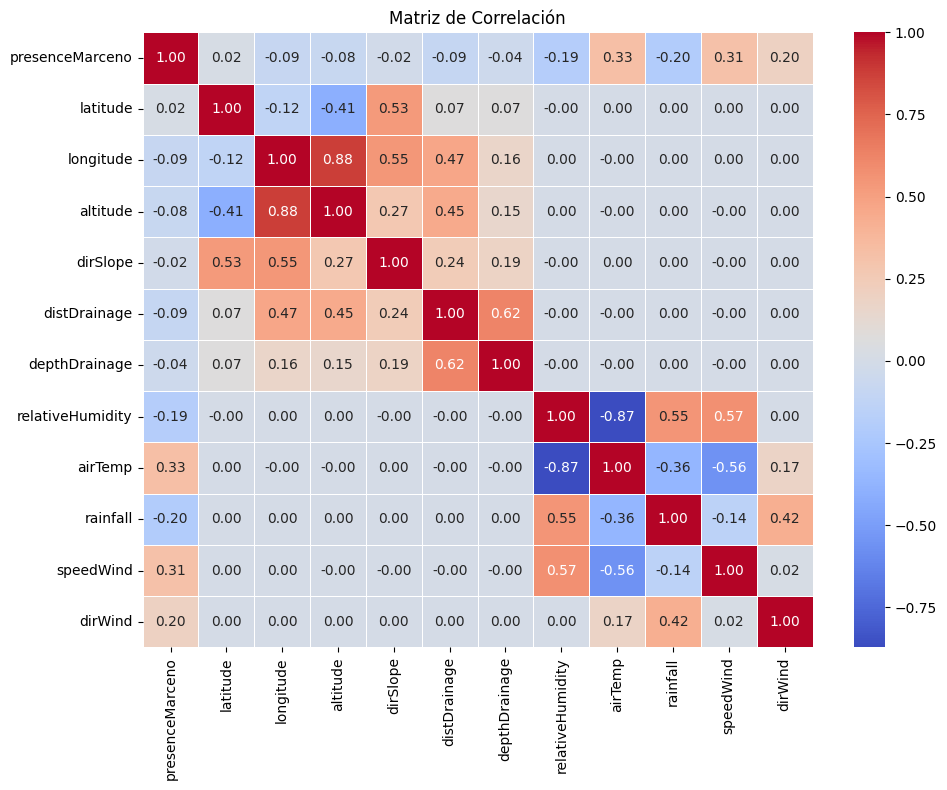

In [47]:
df_corr = raw_climate_tree_pest.select_dtypes(include=['number'])
correlacion = df_corr.corr()

# Visualizar como mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(correlacion, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Matriz de Correlación")
plt.tight_layout()
plt.show()

# Random Forest Classifier

Se explorar este modelo primero pues no requiere normalización, soporta datos faltantes y da importancia de características automáticamente.

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

In [49]:
# Se copia para trabajo solo columnas numéricas
raw_climate_tree_pest_randomf = raw_climate_tree_pest.select_dtypes(include='number')

# se elimina filas con datos faltantes
raw_climate_tree_pest_randomf = raw_climate_tree_pest_randomf.dropna()


Se definen variables independientes y objetivo

In [50]:
X = raw_climate_tree_pest_randomf.drop(columns=['presenceMarceno'])
y = raw_climate_tree_pest_randomf['presenceMarceno']


División para entrenamiento y test

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=42, 
                                                    stratify=y)

# Entrenamiento del modelo RM

Número de arboles adecuado para el modelo

In [52]:

from sklearn.metrics import accuracy_score


tree_count = list(range(10,210,10))
accuricies = []

for n in tree_count:
  rf = RandomForestClassifier(n_estimators=n,random_state=42)
  rf.fit(X_train,y_train)
  y_pred=rf.predict(X_test)
  acc = accuracy_score(y_test,y_pred)
  accuricies.append(acc)

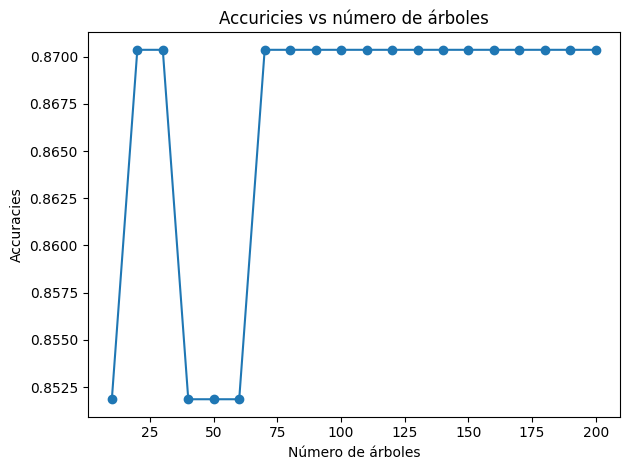

In [53]:
plt.Figure(figsize=(10,6))
plt.plot(tree_count,accuricies,marker="o")
plt.title("Accuricies vs número de árboles")
plt.xlabel("Número de árboles")
plt.ylabel("Accuracies")
plt.tight_layout()
plt.show()

20


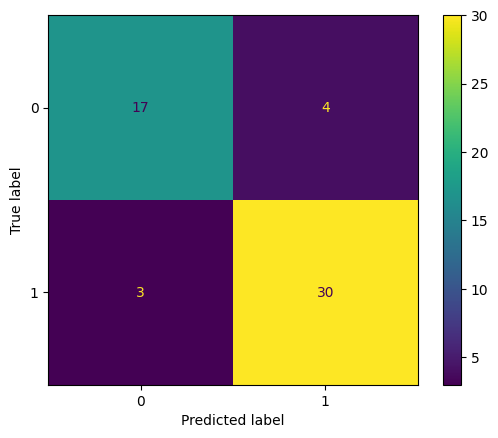

20


In [54]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder

best_n = tree_count[accuricies.index(max(accuricies))] # Nos trae el mejor Accuracy
print(best_n)
best_rf = RandomForestClassifier(n_estimators=best_n,random_state=42)
best_rf.fit(X_train,y_train)
y_pred = best_rf.predict(X_test)

cm = confusion_matrix(y_test,y_pred)

le = LabelEncoder()
y_encoded = le.fit_transform(y)


disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=le.classes_)
disp.plot()
plt.show()

print(best_n)

In [55]:
modelo = RandomForestClassifier(n_estimators=100, random_state=42)
modelo.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

Evaluación  del modelo

In [56]:
y_pred = modelo.predict(X_test)

# Reporte de métricas
print("=== CLASIFICATION REPORT ===")
print(classification_report(y_test, y_pred, digits=3))

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)

=== CLASIFICATION REPORT ===
              precision    recall  f1-score   support

           0      0.850     0.810     0.829        21
           1      0.882     0.909     0.896        33

    accuracy                          0.870        54
   macro avg      0.866     0.859     0.862        54
weighted avg      0.870     0.870     0.870        54



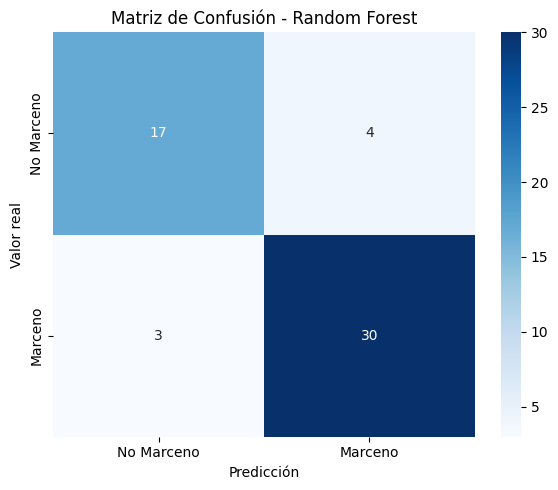

In [57]:
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No Marceno", "Marceno"], yticklabels=["No Marceno", "Marceno"])
plt.xlabel("Predicción")
plt.ylabel("Valor real")
plt.title("Matriz de Confusión - Random Forest")
plt.tight_layout()
plt.show()


In [58]:
from sklearn.metrics import recall_score, f1_score, accuracy_score

recall = recall_score(y_test, y_pred)         # Por defecto para la clase 1
f1 = f1_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print(f"Recall: {recall:.3f}")
print(f"F1-score: {f1:.3f}")
print(f"Accuracy: {accuracy:.3f}")

Recall: 0.909
F1-score: 0.896
Accuracy: 0.870


Interpretación matriz

Se tienen 17 verdaderos negativos vs 3 falsos negativos.

Se tienen 30 verdaderos positivos vs 4 falsos positivos.




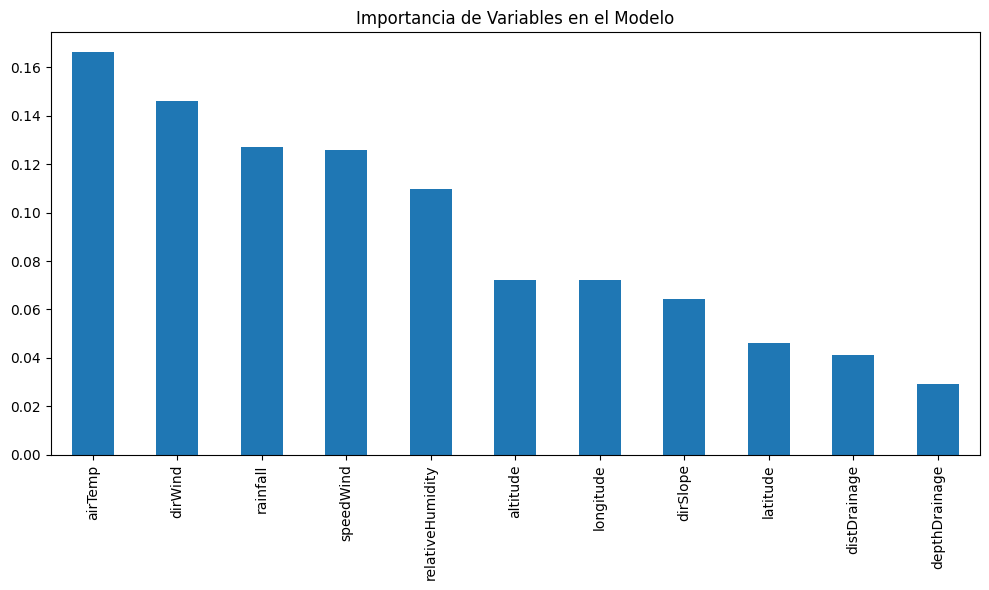

In [59]:
importancias = pd.Series(modelo.feature_importances_, index=X.columns)
importancias = importancias.sort_values(ascending=False)

plt.figure(figsize=(10,6))
importancias.plot(kind='bar')
plt.title("Importancia de Variables en el Modelo")
plt.tight_layout()
plt.show()

# Curva ROC

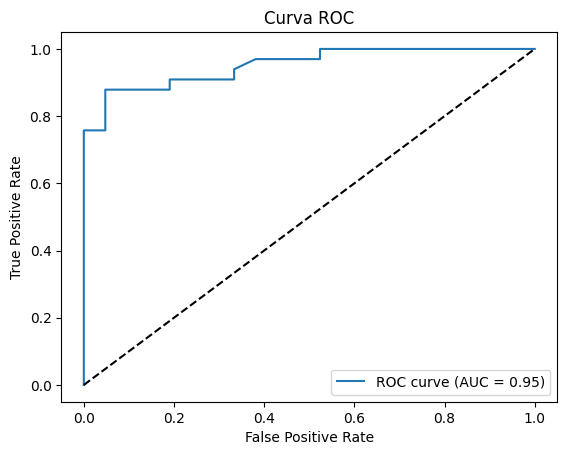

In [60]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Solo si tienes una clasificación binaria
y_prob = modelo.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # línea aleatoria
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

El AUC = 0.95 ese muy alto, lo que indica que el modelo distingue muy bien entre las dos clases de presencia o no precensia de Marceno. El modelo puede ser muy util para tomar decisiones preventivas.

# Interpretación importancia de variables

La temperatura ambiente es la que tiene mayor impacto en predecir la peste Marceno.

Por experiencia, siempre en charlas técnicas de cultivos indican que la variable de humedad relativa es influyente, pero aquí se nota que no es la que más impacta. Sin embargo esta depende del microclima donde se encuentre ubicado el cultivo, ya que se observa que el impacto de la lluvia si es más alto y este a su vez tiene una correlación moderada con la humedad relativa, por lo que se podría decir que como la lluvia no se puede controlar, se puede mitigar un poco el riesgo haciendo podas que permitan entrada de sol una vez termine la lluvia y la circulación de aire entre los surcos del cultivo. 

# Verificación para reducción de dimensiones.

Se realiza pruebas para 2 dimensiones, hasta 8 dimensiones. El resultado es que recién con 5 dimensiones se explica solo el 85% de la varianza total de los datos originales. Con 6 dimensiones ya se explica la varianza total en un 92,79%, el cual es muy bueno para seguir desarrollando los cálculos.

In [61]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

X = raw_climate_tree_pest_randomf.drop(columns=["presenceMarceno"])
y = raw_climate_tree_pest_randomf["presenceMarceno"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=6) # Se reduce a 2 dimensiones para graficar
X_pca = pca.fit_transform(X_scaled)

df_pca = pd.DataFrame(data=X_pca, columns=['PC1','PC2','PC3','PC4','PC5','PC6'])
df_pca['Marceno'] = y.values

'''plt.figure(figsize=(10,6))
sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue='Marceno', palette='Set1')
plt.title('Proyección PCA - 2 Componentes Principales')
plt.xlabel(f"PC1 ({pca.explained_variance_ratio_[0]*100:.2f}% varianza)")
plt.ylabel(f"PC2 ({pca.explained_variance_ratio_[1]*100:.2f}% varianza)")
plt.grid(True)
plt.tight_layout()
plt.show()'''

# ===============================
# 5. Imprimir varianza explicada
# ===============================

print("Varianza explicada por los componentes principales:")
suma_var = 0
for i, var in enumerate(pca.explained_variance_ratio_):
    print(f"PC{i+1}: {var:.4f} ({var*100:.2f}%)")
    suma_var = suma_var + var
    
print(f"Total {suma_var*100:.2f}%")

Varianza explicada por los componentes principales:
PC1: 0.2417 (24.17%)
PC2: 0.2286 (22.86%)
PC3: 0.1445 (14.45%)
PC4: 0.1310 (13.10%)
PC5: 0.1058 (10.58%)
PC6: 0.0764 (7.64%)
Total 92.79%


Pregunta: Repito el paso solo con 6 componentes (las 6 variables mas importantes para el modelo)
Implementar otroas dos tecnologìas (Lineal y KNN)
Agregar lo del grado de complejidad.

# Modelos LR y KNN

In [62]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

X_train2, X_test2, y_train2, y_test2 = train_test_split(df_pca,y,test_size=0.2,random_state=42,stratify=y)

#Inicialización de modelos
logreg = LogisticRegression(max_iter=1000)
knn = KNeighborsClassifier(n_neighbors=6)

#Entrenamiento de los modelos
logreg.fit(X_train2,y_train2)
knn.fit(X_train2,y_train2)

#Predicciones
y_pred_logreg = logreg.predict(X_test2)
y_pred_knn = knn.predict(X_test2)

#Probabilidad para ROC AUX
y_proba_logreg = logreg.predict_proba(X_test2)[:, 1]
y_proba_knn = knn.predict_proba(X_test2)[:, 1]




In [63]:
# =========================
# Evaluar métricas
# =========================

from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve


def mostrar_metricas(nombre, y_test, y_pred, y_proba):
    acc = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_proba)
    print(f"\n=== {nombre} ===")
    print(f"Accuracy: {acc:.3f}")
    print(f"Recall: {recall:.3f}")
    print(f"F1-score: {f1:.3f}")
    print(f"AUC-ROC: {auc:.3f}")
    return roc_curve(y_test, y_proba)

# Mostrar métricas
fpr_log, tpr_log, _ = mostrar_metricas("Logistic Regression", y_test2, y_pred_logreg, y_proba_logreg)
fpr_knn, tpr_knn, _ = mostrar_metricas("K-Nearest Neighbors", y_test2, y_pred_knn, y_proba_knn)



=== Logistic Regression ===
Accuracy: 1.000
Recall: 1.000
F1-score: 1.000
AUC-ROC: 1.000

=== K-Nearest Neighbors ===
Accuracy: 0.852
Recall: 0.848
F1-score: 0.875
AUC-ROC: 0.935


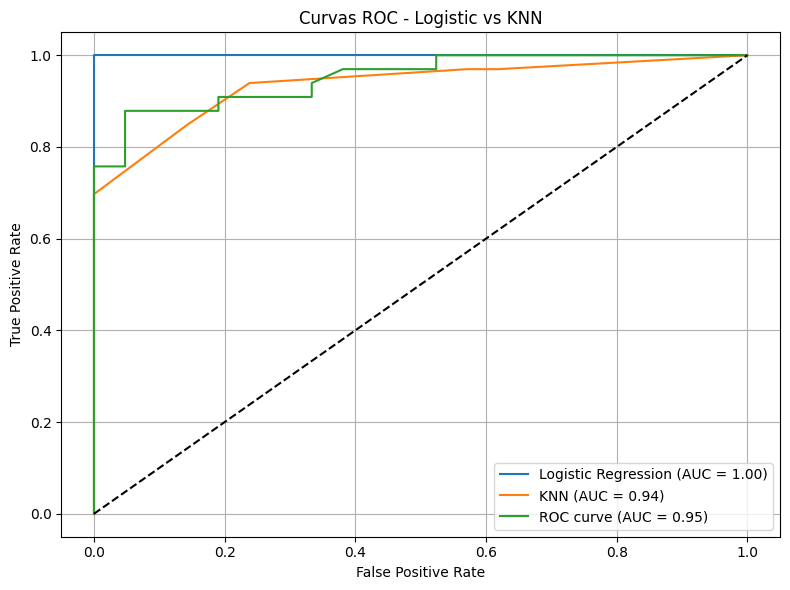

In [ ]:
# =========================
# Curva ROC Comparativa
# =========================

plt.figure(figsize=(8,6))
plt.plot(fpr_log, tpr_log, label="Logistic Regression (AUC = {:.2f})".format(roc_auc_score(y_test2, y_proba_logreg)))
plt.plot(fpr_knn, tpr_knn, label="KNN (AUC = {:.2f})".format(roc_auc_score(y_test2, y_proba_knn)))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Curvas ROC - Logistic vs KNN vs RM")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()

Validación de overfitting para Logistic Regresion

In [67]:
from sklearn.model_selection import cross_val_score, StratifiedKFold

cv = StratifiedKFold(n_splits=6,shuffle=True,random_state=42)

auc_scores = cross_val_score(logreg,X_pca,y,cv=cv,scoring='roc_auc')

#AUC
print("AUC scores:", auc_scores)
print("AUC promedio: {:.3f} ± {:.3f}".format(np.mean(auc_scores), np.std(auc_scores)))

# F1-score
f1_scores = cross_val_score(logreg, X_pca, y, cv=cv, scoring='f1')
print("\nF1 scores:", f1_scores)
print("F1 promedio: {:.3f} ± {:.3f}".format(np.mean(f1_scores), np.std(f1_scores)))

AUC scores: [0.72839506 0.75720165 0.84033613 0.86554622 0.78991597 0.84453782]
AUC promedio: 0.804 ± 0.050

F1 scores: [0.77777778 0.75       0.78571429 0.79310345 0.81967213 0.86206897]
F1 promedio: 0.798 ± 0.035


El AUC en validación cruzada arroja un valor de 0.804, que es por debajo de 1, confirma un caso de sobreajuste al conjunto de prueba fijo. En conclusión el Random Forest sigue siendo el mejor modelo.

# Análisis de complejidad

Hay complejidad no lineal (ej. relaciones entre viento, temperatura, altitud).

No hay garantías de linealidad.

Hay posibilidad de interacciones entre variables climáticas.

El dataset tiene una cantidad moderada de datos, ideal para árboles.

Un modelo no paramétrico como Random Forest es muy apropiado.